# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score

# Preprocessing

In [11]:
data = pd.read_csv('train.csv')

data = data.dropna(subset=['original'])

naive_data= data.notnull().sum()

# 성별이 NaN 처리된 데이터를 0 또는 1로 채움
# 단, 한 사람의 데이터의 경우 성별을 하나로 통일
gender = np.random.choice([0,1])
for i in data[data['1'].isnull()].iterrows():
    if i[1]['timestamp(hr)'] != 0:
        data['1'][i[0]] = gender
    else:
        data['1'][i[0]] = gender
        gender = np.random.choice([0,1])

# 나이가 NaN처리된 데이터는 나이의 평균값을 반올림하여 채움
data['2'].fillna(value= data['2'].mean().round(),inplace=True)

# column별 static value 개수
column_counts = data.notnull().sum()

# 환자가 확진을 받는 시점 수 == 환자 수
patients= []
for idx, i in enumerate(data.iterrows()):
    if i[1]['timestamp(hr)'] == 0:
        patients.append(idx)

# 각 환자별로 빈값들을 Linear interpolate 밑 backfill
start =0
for  end in patients:
    data.iloc[start:end+1,:34] = data.iloc[start:end +1, :34].interpolate()
    start = end+1
start =0
for  end in patients:
    data.iloc[start:end+1,:34] = data.iloc[start:end +1, :34].interpolate(method='bfill')
    start = end+1

# 한 환자의 모든 관측정보에서 단한번도 등장하지 않았던 feature값들은 여전히 NaN
# 이 값들은 해당 데이터의 평균으로 imputation
random_weight = np.random.uniform(-2,2)
data.fillna(data.mean()+ random_weight*data.std(),inplace=True)

smote
======

Made label counts 

0: 63085(default) , -1: 60000 (by smote), -2: 60000 (by smote) , -3: 60390 (-3.0 : 20390(default), -4.0: 20000(by smote), -5.0: 20000(by smote))

In [4]:
day_column = data['timestamp(day)'].copy()

day_column[day_column<-3] = -3
value_counts = day_column.value_counts()
print('number of label values', value_counts)

number of label values timestamp(day)
 0.0    63085
-3.0    48326
-1.0    37555
-2.0    26548
Name: count, dtype: int64


In [5]:
X = data.drop(['timestamp(day)'], axis=1).copy()
selected = data['timestamp(day)'].copy()
X_minority = X
Y_minority = selected 

smote = SMOTE(sampling_strategy={-1: 60000, -2: 60000, -4:20000,-5:20000})  
X_smote, y_smote = smote.fit_resample(X_minority, Y_minority)

X_smote.insert(34, 'timestamp(day)', y_smote)
smote_data = X_smote
day_column = smote_data['timestamp(day)']

value_counts = day_column.value_counts()
print('number of label values using smote:', value_counts)

number of label values using smote: timestamp(day)
 0.0    63085
-2.0    60000
-1.0    60000
-3.0    20390
-5.0    20000
-4.0    20000
Name: count, dtype: int64


In [6]:
smote_data

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,timestamp(day),timestamp(hr),original
0,0.0,62.0,63.000000,106.000000,106.000000,19.000000,37.000000,0.02,0.300000,51.100000,...,78.600000,60.662908,10.900000,121.33892,4.110000,13.600000,7.750000,-5.0,-137.000000,1.0
1,0.0,62.0,63.000000,106.000000,106.000000,19.000000,37.000000,0.02,0.283333,51.100000,...,79.766667,60.662908,10.983333,121.33892,4.140000,13.633333,7.983333,-5.0,-135.000000,1.0
2,0.0,62.0,94.000000,144.000000,100.000000,17.000000,36.766667,0.02,0.266667,51.100000,...,80.933333,60.662908,11.066667,121.33892,4.170000,13.666667,8.216667,-5.0,-133.000000,1.0
3,0.0,62.0,88.000000,113.000000,94.000000,15.000000,36.533333,0.02,0.250000,51.100000,...,82.100000,60.662908,11.150000,121.33892,4.200000,13.700000,8.450000,-5.0,-129.000000,1.0
4,0.0,62.0,83.000000,96.000000,98.000000,20.000000,36.300000,0.02,0.233333,51.100000,...,83.266667,60.662908,11.233333,121.33892,4.230000,13.733333,8.683333,-5.0,-128.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243470,1.0,58.0,50.501755,125.186403,96.250878,22.562719,36.756272,0.00,0.884030,219.455567,...,64.376423,60.967103,13.079934,121.33892,2.119753,16.368060,0.394791,-1.0,-39.874561,1.0
243471,0.0,57.0,87.000000,139.123737,92.093691,12.862879,37.627424,0.00,12.000000,156.300000,...,27.300000,53.425075,13.200000,121.33892,2.839148,13.262292,0.136229,-1.0,-31.274242,1.0
243472,0.0,74.0,64.477186,105.780100,88.412864,13.174271,36.858714,0.01,0.100000,155.700000,...,89.600000,65.800000,13.079934,121.33892,3.270000,16.400000,15.030000,-1.0,-25.761407,1.0
243473,0.0,71.0,51.573412,103.265883,132.720235,24.000000,37.442659,0.00,0.000000,145.797277,...,65.300000,60.662908,15.500000,121.33892,2.637544,24.108863,2.900838,-1.0,-35.587293,1.0


Normalize
=====


In [7]:
before_norm_smote_data = smote_data.copy()
# 방법 1 : 평균 0, std 1로 normalize
# scalar = StandardScaler()
# features = smote_data.columns[2:34]
# smote_data[features] = scalar.fit_transform(smote_data[features])

# 방법 2: MIN_MAX Normalization 방식
for column in smote_data.columns[2:34]:
    min_val = smote_data[column].min()
    max_val = smote_data[column].max()
    scaled = (smote_data[column] - min_val) / (max_val - min_val)
    smote_data[column] = scaled

# EDA


number of patients:  4156
mean value of label (day) w/o smote: -1.5681199220574997 median value of label (day): w/o smote -1.0
mean value of label (day) w smote: -1.7298285244891674 median value of label (day): w smote -1.0
          mean        std
0     0.586257   0.488969
1    65.493764  13.918146
2    65.607130  14.580569
3   116.780576  27.985360
4    97.866698  28.885730
5    20.715153   4.952277
6    36.987825   8.058873
7     0.041650   0.078178
8     0.389286   0.906460
9   133.260354  89.742798
10    9.419489  12.220222
11   11.378740  12.848880
12    0.116829   0.336775
13    1.139398   2.283675
14   29.141986   5.404802
15    9.754530   1.769562
16    0.159294   0.150575
17    1.589342   1.451604
18    0.718345   0.581393
19   10.472030  13.463137
20   31.078544   2.453096
21   33.549165   2.195093
22   92.737082   6.442302
23    0.478808   0.430701
24    4.421178   3.644192
25    9.874827   1.608999
26   11.053160   8.348282
27   82.512463  15.606428
28   60.095706  10.356

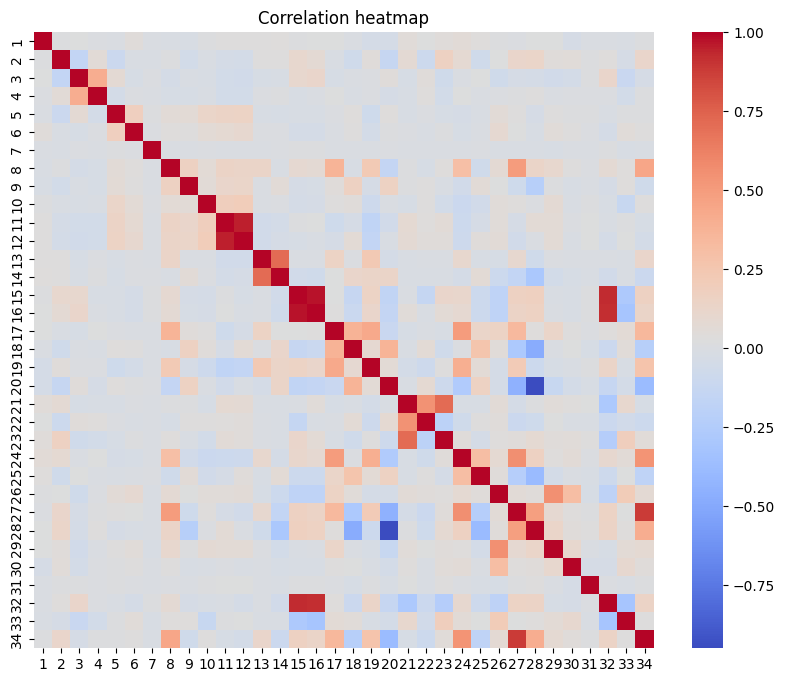

1                 175514
2                 175514
3                 175514
4                 175514
5                 175514
6                 175514
7                 175514
8                 175514
9                 175514
10                175514
11                175514
12                175514
13                175514
14                175514
15                175514
16                175514
17                175514
18                175514
19                175514
20                175514
21                175514
22                175514
23                175514
24                175514
25                175514
26                175514
27                175514
28                175514
29                175514
30                175514
31                175514
32                175514
33                175514
34                175514
timestamp(day)    175514
timestamp(hr)     175514
original          175514
dtype: int64


In [12]:
# 1) train dataset의 환자수
num_patients = len(patients)
print('number of patients: ', num_patients)

# 2) mean and median value of label timestamp(day)
print('mean value of label (day) w/o smote:', data['timestamp(day)'].mean(), 
    'median value of label (day): w/o smote', data['timestamp(day)'].median())

print('mean value of label (day) w smote:', before_norm_smote_data['timestamp(day)'].mean(), 
    'median value of label (day): w smote', before_norm_smote_data['timestamp(day)'].median())

# 3) dataset mean, std and heatmap of feature correlation matrix, and data sparsity
mean_std_values = pd.DataFrame(columns=['mean','std'])
mean_std_values['mean'] = before_norm_smote_data.iloc[:,:34].mean().values
mean_std_values['std'] = before_norm_smote_data.iloc[:,:34].std().values
print(mean_std_values)

correlation_matrix = before_norm_smote_data[before_norm_smote_data.columns[:34]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

naive_data= data.notnull().sum()
print(naive_data)
# 4) and 5) answers are in report 


# Model Selection



In [ ]:
# import lightgbm as lgb
# d_train = lgb.Dataset(data.iloc[:,:34], label = data.iloc[:,34]+5)
# params={}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'multiclass'
# params['num_class'] = 6
# clf = lgb.train(params, d_train, 100)

# train_pred = clf.predict(data.iloc[:,:34]).argmax(axis=1)-5
# train_pred[train_pred < -3] = -3

# train_label = data.iloc[:,34]
# train_label[train_label < -3] = -3
# accuracy_score(train_pred, train_label )
# f1_score(train_label, train_pred, average='macro')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7913
[LightGBM] [Info] Number of data points in the train set: 175514, number of used features: 34
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.289749
[LightGBM] [Info] Start training from score -1.888764
[LightGBM] [Info] Start training from score -1.541912
[LightGBM] [Info] Start training from score -1.023236


0.21690785972856635

# Model Tuning



In [ ]:
# test_data = pd.read_csv('test.csv')
# test_data = test_data.dropna(subset=['original'])


# gender = np.random.choice([0,1])
# for i in test_data[test_data['1'].isnull()].iterrows():
#     if i[1]['timestamp(hr)'] != 0:
#         test_data['1'][i[0]] = gender
#     else:
#         test_data['1'][i[0]] = gender
#         gender = np.random.choice([0,1])

# # 나이가 NaN처리된 데이터는 나이의 평균값을 반올림하여 채움
# test_data['2'].fillna(value= test_data['2'].mean().round(),inplace=True)

# # 환자가 확진을 받는 시점 수 == 환자 수
# patients= []
# for idx, i in enumerate(test_data.iterrows()):
#     if i[1]['timestamp(hr)'] == 0:
#         patients.append(idx)

# # 각 환자별로 빈값들을 Linear interpolate 밑 backfill
# start =0
# for  end in patients:
#     test_data.iloc[start:end+1,:34] = test_data.iloc[start:end +1, :34].interpolate()
#     start = end+1
# start =0
# for  end in patients:
#     test_data.iloc[start:end+1,:34] = test_data.iloc[start:end +1, :34].interpolate(method='bfill')
#     start = end+1

# test_data.fillna(data.mean(),inplace=True)

# for column in test_data.columns[2:34]:
#     min_val = test_data[column].min()
#     max_val = test_data[column].max()
#     scaled = (test_data[column] - min_val) / (max_val - min_val)
#     test_data[column] = scaled

# y_label = test_data.iloc[:,34]
# y_label[y_label < -3 ] = -3
# print(test_data)


# x_data = test_data.iloc[:,:34]
# y_pred = clf.predict(x_data) 

# y_pred = y_pred.argmax(axis=1)-5

# # y_pred = np.array(y_pred)
# y_pred[y_pred < -3] = -3 


# accuracy_score(y_label, y_pred)
# f1_score(y_label, y_pred, average='macro')


         1     2         3         4         5    6         7         8   
0      0.0  88.0  0.567164  0.413636  0.316832  0.2  0.292969  0.087719  \
122    0.0  88.0  0.567164  0.413636  0.316832  0.2  0.292969  0.035088   
123    0.0  88.0  0.567164  0.413636  0.316832  0.2  0.292969  0.035088   
125    0.0  88.0  0.563433  0.561364  0.383663  0.2  0.285216  0.035088   
127    0.0  88.0  0.559701  0.709091  0.450495  0.2  0.290643  0.035088   
...    ...   ...       ...       ...       ...  ...       ...       ...   
69118  1.0  65.0  0.544776  0.586364  0.450495  0.2  0.295295  0.016412   
69120  1.0  65.0  0.496269  0.538636  0.440594  0.2  0.291419  0.016412   
69122  1.0  65.0  0.447761  0.490909  0.430693  0.2  0.290643  0.016412   
69124  1.0  65.0  0.447761  0.490909  0.430693  0.2  0.289093  0.016412   
69126  1.0  65.0  0.447761  0.490909  0.430693  0.2  0.289868  0.016412   

              9        10  ...        28   29        30   31        32   
0      0.079365  0.256320

0.23017382859435825

# Model Evaluation / Metrics